Import Pakages

In [1]:
import numpy,math
from PIL import Image
from matplotlib import pyplot as plt

Some Conifgs

In [2]:
img_path = "./image01.jpg"
window_size = 65

Some Utilities

In [9]:
def read_img(img_path:str)->Image.Image:
    img = Image.open(img_path)
    return img

def parse_img(img:Image.Image,window_size:int):
    M,N = img.size[0],img.size[1]
    img_list = split_img(img,window_size)
    new_img_list = []
    for image in img_list:
        colors = Image.Image.getcolors(image,12675)
        colors.sort(reverse=True)
        colors = colors[0:24]
        mean_color = sum(i*numpy.array(j) for i,j in colors)
        new_img_list.append(img_filter(image,(mean_color/sum(i for i,j in colors)).astype(int)))        
    return img_list,new_img_list
 
def split_img(img:Image.Image,window_size:int=25)->list[Image.Image]:
    N,M = img.size[0],img.size[1]
    img_list = []
    for i in range(0,int(N/window_size)):
        img_list.append(img.crop([i*window_size,0,(i+1)*window_size,M-1]))
    return img_list

def img_filter(img:Image.Image,threshold:tuple)->Image.Image:
    img = img.convert('RGB')
    G = (0,255,255)
    new_imdata = []
    for color in img.getdata():
        if RGB_diff(color,threshold) > 64:
            new_imdata.append(G)
        else:
            new_imdata.append(color)
    new_image = Image.new(mode=img.mode,size=img.size)
    new_image.putdata(new_imdata)
    return new_image

def RGB_diff(color:tuple,threshold:tuple)->float:
    delta_R = color[0]-threshold[0]
    delta_G = color[1]-threshold[1]
    delta_B = color[2]-threshold[2]
    R_mean = (color[0]+threshold[0])/2
    if R_mean<128:
        return math.sqrt(2*delta_R**2+4*delta_G**2+3*delta_B**2)
    else:
        return math.sqrt(3*delta_R**2+4*delta_G**2+2*delta_B**2)
    
def plot_image(img_list,new_img_list):
    im1 = get_concat_h(img_list)
    im2 = get_concat_h(new_img_list)

    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(2,1,1)
    plt.imshow(im1)
    plt.axis('off')
    plt.title('origin')
    fig.add_subplot(2,1,2)
    plt.imshow(im2)
    plt.axis('off')
    plt.title('filtered')

def get_concat_h(imgs:list[Image.Image]):
    new_width = sum(im.size[0] for im in imgs)
    new_img = Image.new(mode=imgs[0].mode,size=(new_width,imgs[0].height))
    w = 0
    for i in range(len(imgs)):
        new_img.paste(imgs[i],(w,0))
        w += imgs[i].size[0]
    return new_img

Main

In [11]:
img = read_img(img_path)
img_list,new_img_list = parse_img(img,window_size)

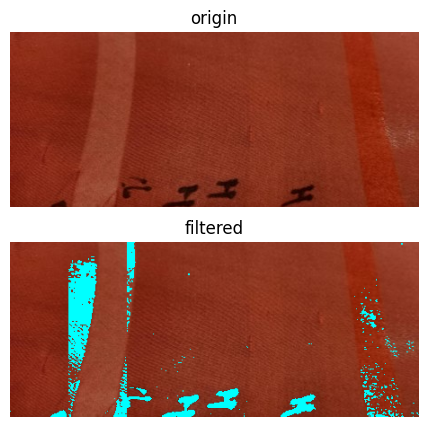

In [12]:
plot_image(img_list,new_img_list)